In [1]:
##http://www.sthda.com/english/wiki/correlation-test-between-two-variables-in-r
##https://statsandr.com/blog/correlation-coefficient-and-correlation-test-in-r/

In [2]:
library("ggpubr")


Loading required package: ggplot2



**Pearson correlation** (r), which measures a linear dependence between two variables (x and y). It’s also known as a parametric correlation test because it depends to the distribution of the data. It can be used only when x and y are from normal distribution. The plot of y = f(x) is named the linear regression curve.

**Kendall tau** and **Spearman rho**, which are rank-based correlation coefficients (non-parametric)



In [3]:
mtcars <- mtcars
head(mtcars, 6)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


`geom_smooth()` using formula = 'y ~ x'


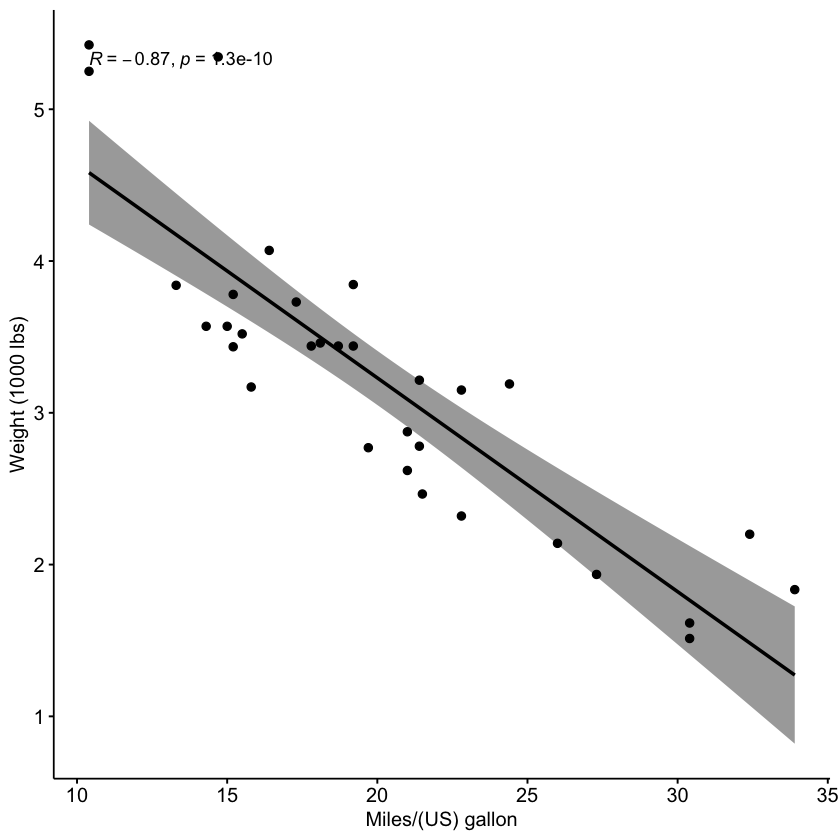

In [4]:
library("ggpubr")
ggscatter(mtcars, x = "mpg", y = "wt", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)")

In [5]:
# Shapiro-Wilk normality test for mpg
shapiro.test(mtcars$mpg) # => p = 0.1229
# Shapiro-Wilk normality test for wt
shapiro.test(mtcars$wt) # => p = 0.09


	Shapiro-Wilk normality test

data:  mtcars$mpg
W = 0.94756, p-value = 0.1229



	Shapiro-Wilk normality test

data:  mtcars$wt
W = 0.94326, p-value = 0.09265


Warning message:
“The following aesthetics were dropped during statistical transformation:
sample
ℹ This can happen when ggplot fails to infer the correct grouping structure
  in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation:
sample
ℹ This can happen when ggplot fails to infer the correct grouping structure
  in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation:
sample
ℹ This can happen when ggplot fails to infer the correct grouping structure
  in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation:
sample
ℹ This can happen when ggplot fa

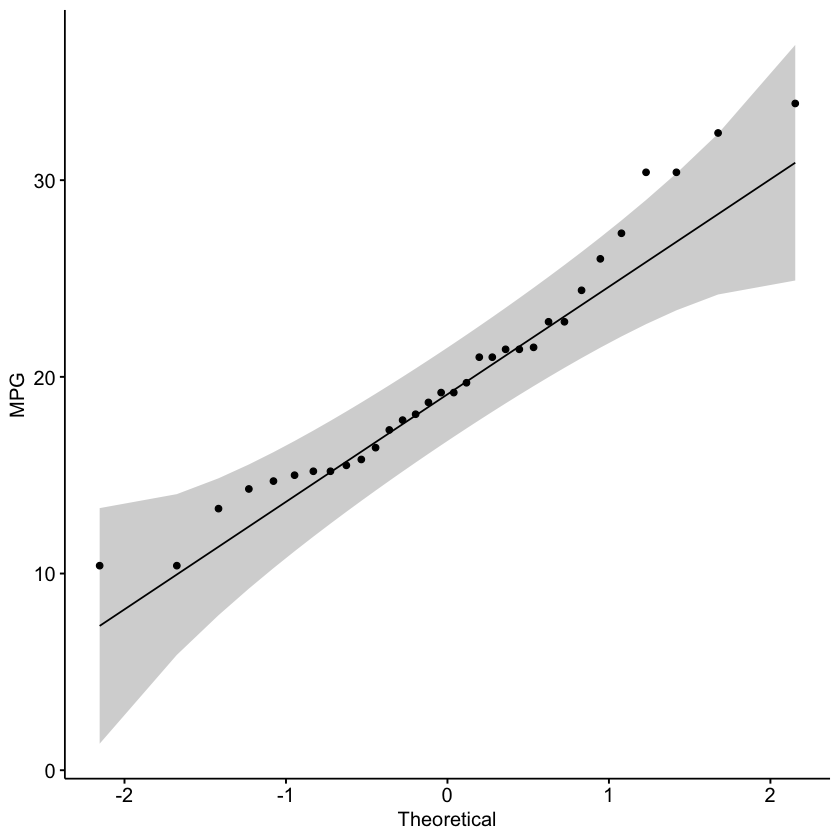

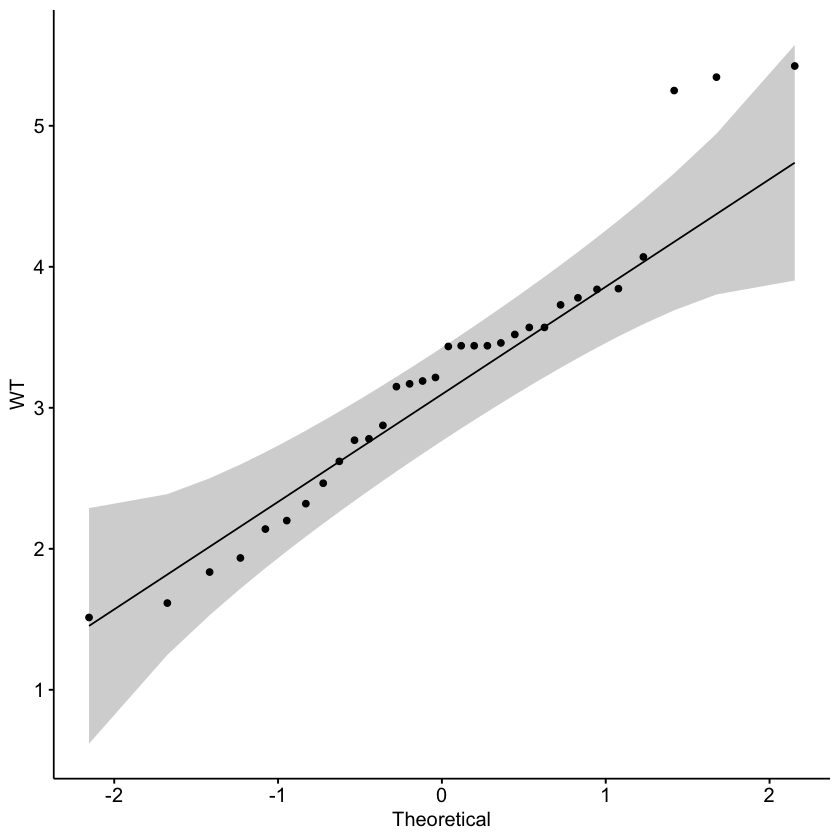

In [6]:
library("ggpubr")
# mpg
ggqqplot(mtcars$mpg, ylab = "MPG")
# wt
ggqqplot(mtcars$wt, ylab = "WT")

In [7]:
res <- cor.test(mtcars$wt, mtcars$mpg, 
                    method = "pearson")
res


	Pearson's product-moment correlation

data:  mtcars$wt and mtcars$mpg
t = -9.559, df = 30, p-value = 1.294e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9338264 -0.7440872
sample estimates:
       cor 
-0.8676594 


In [8]:
# Extract the p.value
res$p.value

[1] 1.293959e-10

In [9]:
# Extract the correlation coefficient
res$estimate

cor 
-0.8676594

In [10]:
res2 <- cor.test(mtcars$wt, mtcars$mpg,  method="kendall")
res2

Warning message in cor.test.default(mtcars$wt, mtcars$mpg, method = "kendall"):
“Cannot compute exact p-value with ties”



	Kendall's rank correlation tau

data:  mtcars$wt and mtcars$mpg
z = -5.7981, p-value = 6.706e-09
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.7278321 


In [11]:
res2 <-cor.test(mtcars$wt, mtcars$mpg,  method = "spearman")
res2

Warning message in cor.test.default(mtcars$wt, mtcars$mpg, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  mtcars$wt and mtcars$mpg
S = 10292, p-value = 1.488e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.886422 


1 indicates a strong negative correlation : this means that every time x increases, y decreases
0 means that there is no association between the two variables (x and y)
1 indicates a strong positive correlation : this means that y increases with x


In [12]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [13]:
# remove vs and am variables
library(tidyverse)
dat <- mtcars %>%
  select(-vs, -am)

# display 5 first obs. of new dataset
head(dat, 5)

── Attaching packages ───────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.1      
── Conflicts ──────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,3,2


In [14]:
# correlation for all variables
round(cor(dat),
  digits = 2 # rounded to 2 decimals
)

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,-0.21,-0.66
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,1.00,0.27
carb,-0.55,0.53,0.39,0.75,-0.09,0.43,-0.66,0.27,1.00


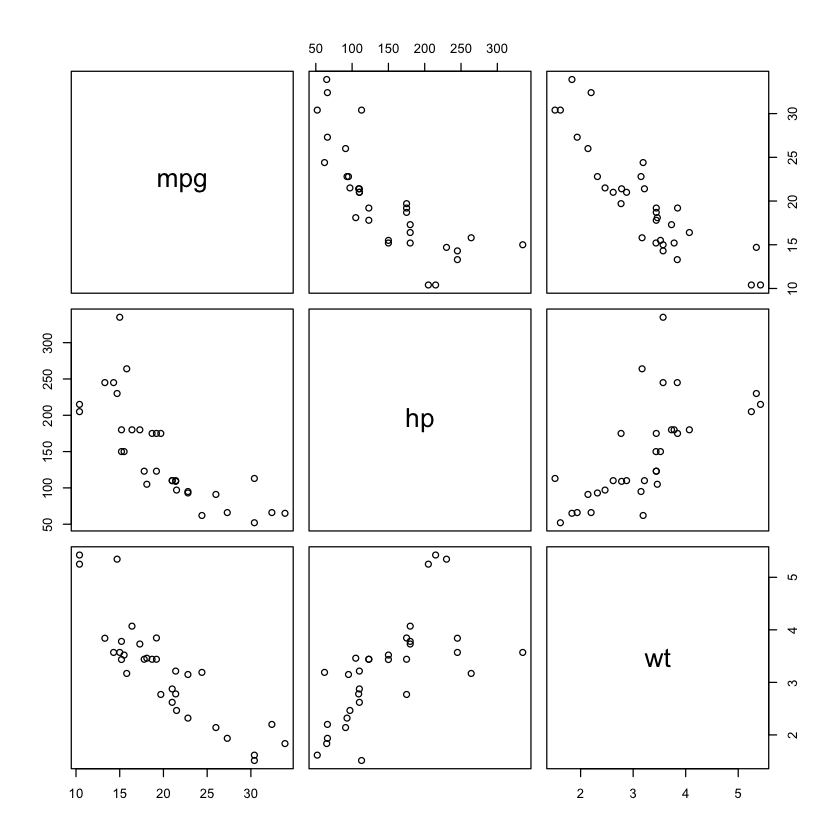

In [15]:
# multiple scatterplots
pairs(dat[, c("mpg", "hp", "wt")])

corrplot 0.92 loaded



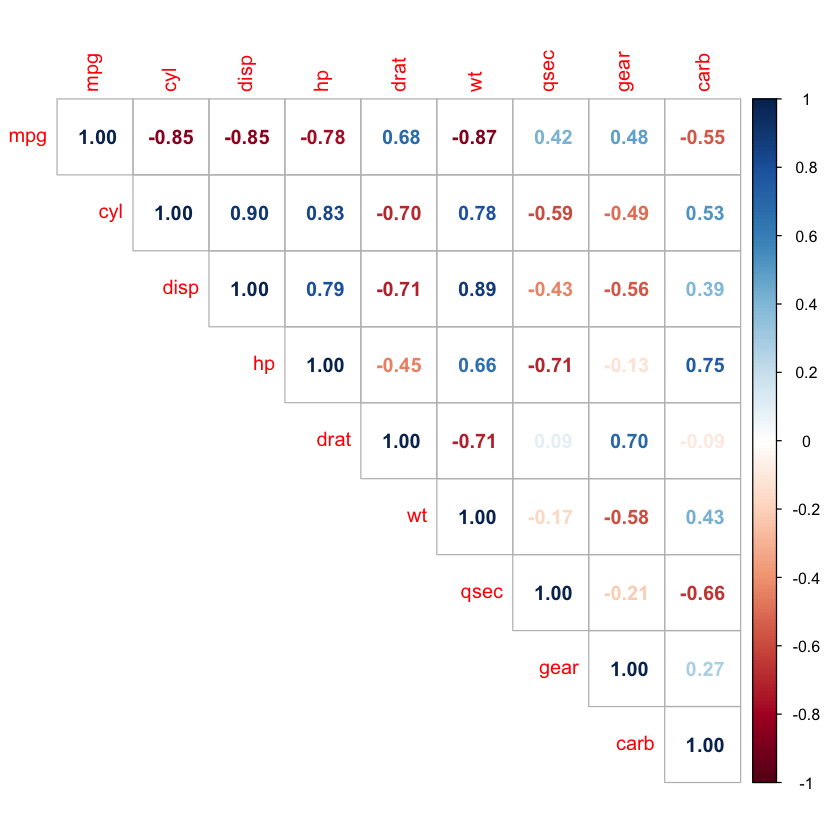

In [16]:
# improved correlation matrix
library(corrplot)

corrplot(cor(dat),
  method = "number",
  type = "upper" # show only upper side
)

In [17]:
# correlation tests for whole dataset
library(Hmisc)
res <- rcorr(as.matrix(dat)) # rcorr() accepts matrices only


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [18]:

# display p-values (rounded to 3 decimals)
round(res$P, 3)

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
mpg,NA,0.000,0.000,0.000,0.000,0.000,0.017,0.005,0.001
cyl,0.000,NA,0.000,0.000,0.000,0.000,0.000,0.004,0.002
disp,0.000,0.000,NA,0.000,0.000,0.000,0.013,0.001,0.025
hp,0.000,0.000,0.000,NA,0.010,0.000,0.000,0.493,0.000
drat,0.000,0.000,0.000,0.010,NA,0.000,0.620,0.000,0.621
wt,0.000,0.000,0.000,0.000,0.000,NA,0.339,0.000,0.015
qsec,0.017,0.000,0.013,0.000,0.620,0.339,NA,0.243,0.000
gear,0.005,0.004,0.001,0.493,0.000,0.000,0.243,NA,0.129
carb,0.001,0.002,0.025,0.000,0.621,0.015,0.000,0.129,NA


You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

Registered S3 method overwritten by 'ggside':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


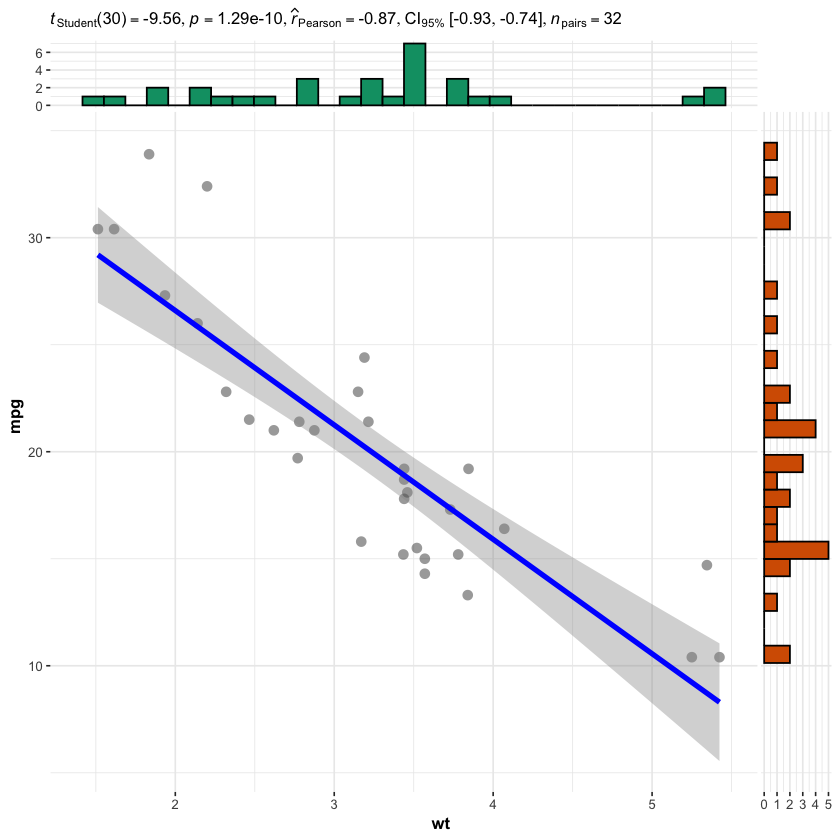

In [19]:
## plot with statistical results
library(ggstatsplot)
ggscatterstats(
  data = dat,
  x = wt,
  y = mpg,
  bf.message = FALSE
)

In [20]:
#install.packages('ggside')

In [21]:
##install.packages("ggstatsplot")
# needed package to download from GitHub repo
#utils::install.packages(pkgs = "devtools")   

# downloading the package from GitHub
#devtools::install_github(
#  repo = "IndrajeetPatil/ggstatsplot", # package path on GitHub
#  dependencies = FALSE,                # assumes that you already have all packages installed needed for this package to work
#  quick = TRUE                         # skips docs, demos, and vignettes
#)   

In [22]:
#library(correlation)
library(easystats)
correlation(dat,
  include_factors = TRUE, method = "auto"
)

# Attaching packages: easystats 0.6.0 (red = needs update)
✔ bayestestR  0.13.0   ✔ correlation 0.8.3 
✔ datawizard  0.6.5    ✖ effectsize  0.8.2 
✖ insight     0.18.8   ✔ modelbased  0.8.6 
✔ performance 0.10.2   ✔ parameters  0.20.2
✔ report      0.5.5    ✔ see         0.7.4 

Restart the R-Session and update packages in red with `easystats::easystats_update()`.


ERROR while rich displaying an object: Error in vapply(part, function(col) {: values must be length 36,
 but FUN(X[[1]]) result is length 9

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name

In [27]:
#install.packages('easystats')

In [28]:
# do not edit
corrplot2 <- function(data,
                      method = "pearson",
                      sig.level = 0.05,
                      order = "original",
                      diag = FALSE,
                      type = "upper",
                      tl.srt = 90,
                      number.font = 1,
                      number.cex = 1,
                      mar = c(0, 0, 0, 0)) {
  library(corrplot)
  data_incomplete <- data
  data <- data[complete.cases(data), ]
  mat <- cor(data, method = method)
  cor.mtest <- function(mat, method) {
    mat <- as.matrix(mat)
    n <- ncol(mat)
    p.mat <- matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n - 1)) {
      for (j in (i + 1):n) {
        tmp <- cor.test(mat[, i], mat[, j], method = method)
        p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
      }
    }
    colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
    p.mat
  }
    p.mat <- cor.mtest(data, method = method)
  col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
  corrplot(mat,
    method = "color", col = col(200), number.font = number.font,
    mar = mar, number.cex = number.cex,
    type = type, order = order,
    addCoef.col = "black", # add correlation coefficient
    tl.col = "black", tl.srt = tl.srt, # rotation of text labels
    # combine with significance level
    p.mat = p.mat, sig.level = sig.level, insig = "blank",
    # hide correlation coefficients on the diagonal
    diag = diag
  )
}

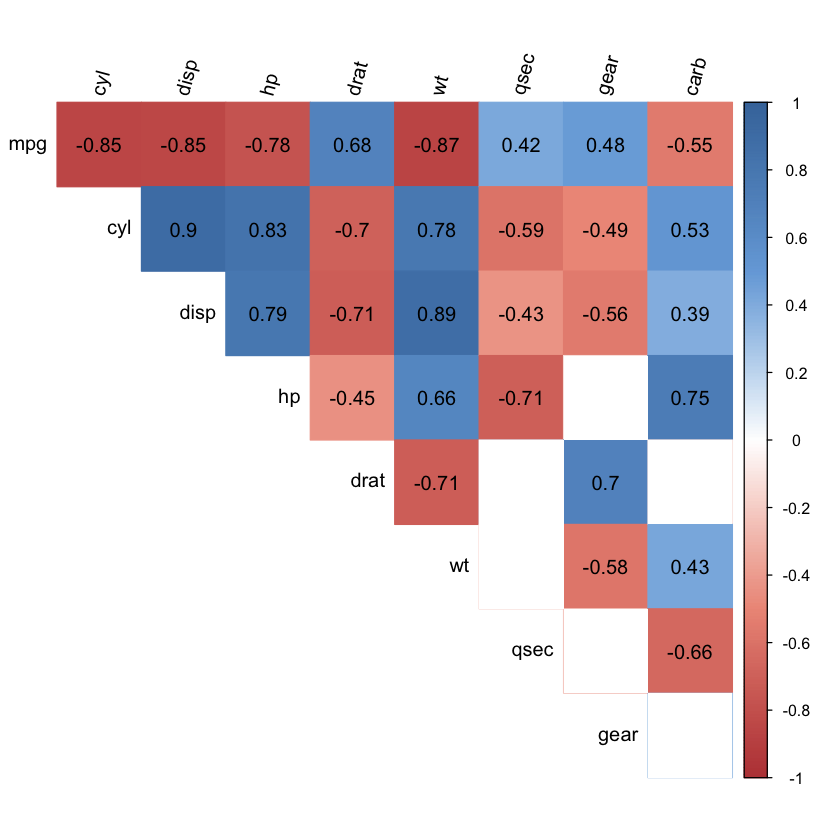

In [29]:
# edit from here
corrplot2(
  data = dat,
  method = "pearson",
  sig.level = 0.05,
  order = "original",
  diag = FALSE,
  type = "upper",
  tl.srt = 75
)

In [30]:
library(GGally)

ggpairs(dat[, c("mpg", "hp", "wt")])

ERROR: Error in library(GGally): there is no package called ‘GGally’


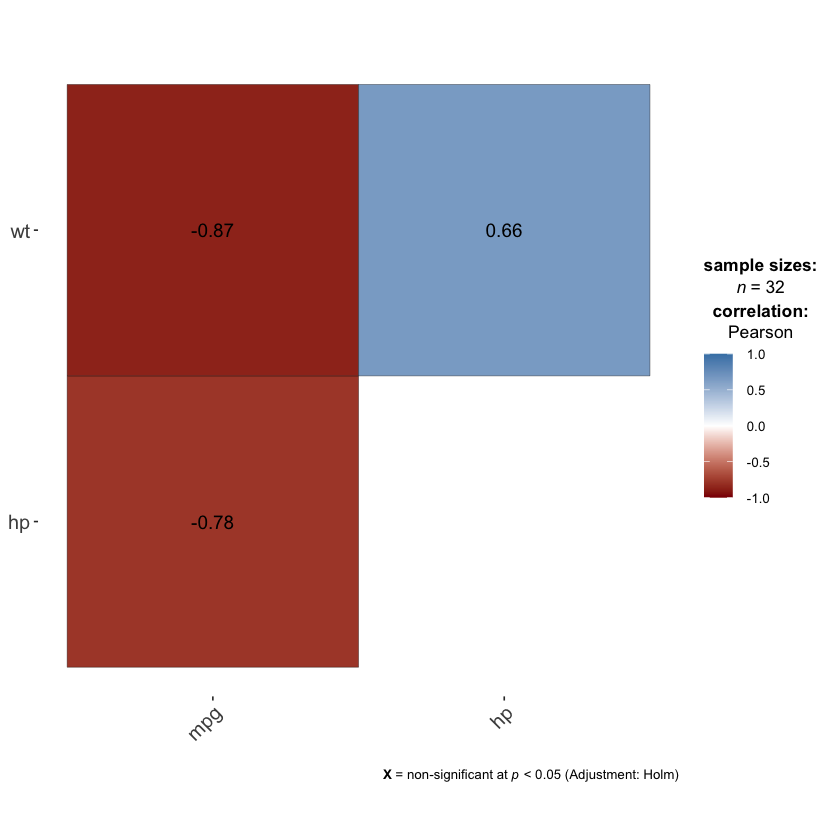

In [31]:
library(ggstatsplot)

ggcorrmat(
  data = dat[, c("mpg", "hp", "wt")],
  type = "parametric", # parametric for Pearson, nonparametric for Spearman's correlation
  colors = c("darkred", "white", "steelblue") # change default colors
)


In [32]:
#install.packages('ggcorrplot')

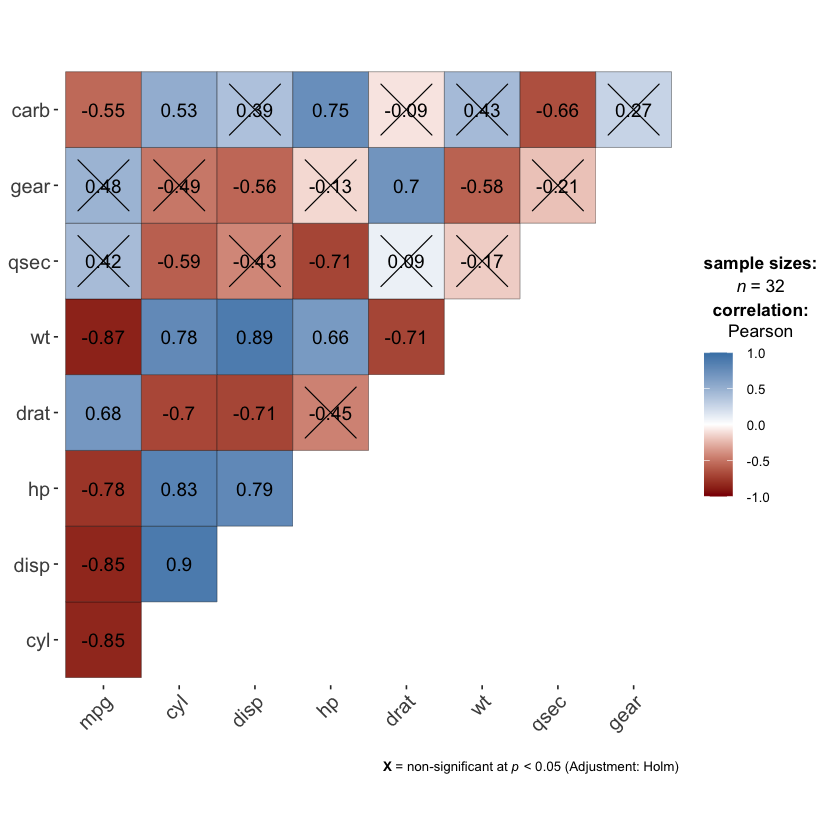

In [33]:
# load package
library(ggstatsplot)

# correlogram
ggstatsplot::ggcorrmat(
  data = dat,
  type = "parametric", # parametric for Pearson, nonparametric for Spearman's correlation
  colors = c("darkred", "white", "steelblue") # change default colors
)

In [34]:
# devtools::install_github("laresbernardo/lares")
library(lares)

corr_cross(dat, # name of dataset
  max_pvalue = 0.05, # display only significant correlations (at 5% level)
  top = 10 # display top 10 couples of variables (by correlation coefficient)
)

ERROR: Error in library(lares): there is no package called ‘lares’


In [35]:
#devtools::install_github("laresbernardo/lares")

In [ ]:
#devtools::install_github("laresbernardo/lares")


In [36]:
install.packages("lares")


also installing the dependency ‘h2o’


Warning message in download.file(url, destfile, method, mode = "wb", ...):
“downloaded length 121208832 != reported length 179355205”
Warning message in download.file(url, destfile, method, mode = "wb", ...):
“URL 'https://cran.r-project.org/bin/macosx/contrib/4.2/h2o_3.38.0.1.tgz': Timeout of 60 seconds was reached”


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/bin/macosx/contrib/4.2/h2o_3.38.0.1.tgz' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘h2o’ failed”



The downloaded binary packages are in
	/var/folders/3f/6pzn2nyn32d7wthyxkzsqyxcdrtvym/T//RtmpjQBC7Y/downloaded_packages
